# Linear Regression 
## 1. Parameters estimation based on derivation 


### 1.1. Importing libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 6)

### 1.2. Generate dataset following the equation 
$y = 13 + 4X + \sigma{(0,1)}$

In [8]:
noise_param = 70
X = np.linspace(0, 50, num=500)
Y = 13 + 4*X + (noise_param * np.random.normal(0, 1, X.shape))
dataset = np.vstack((X, Y)).T

### 1.3. Estimate parameters $\beta_0$(y-intercept) and $\beta_1$(slope) using statistical derivation formula
$y = \beta_0 + \beta_1X$

#### Estination based on derivation of the above formula, we get the following
$
\begin{align}
   \beta_1 = \frac{ \displaystyle\sum{(X_i - \overline{X})(Y_i - \overline{Y})} } { \displaystyle\sum{(X_i - \overline{X})^2} }
\end{align}
$

$
\begin{align}
   \beta_0 = \overline{Y} - \beta_1 \overline{X}
\end{align}
$

In [9]:
# Estimating beta_0 and beta_1
beta_1 = np.cov(dataset, rowvar=False)[0,1] / np.var(X)
beta_0 = np.mean(Y) - beta_1 * np.mean(X)

print("Estimated Weights: ")
print("b0 = ", beta_0)
print("b1 = ", beta_1)

Estimated Weights: 
b0 =  15.005102898383186
b1 =  4.057143383313168


### 1.4. Computing SSE(SumofSquaredError) 

In [10]:
# From estimated parameters, compute y_pred
y_pred = beta_0 + beta_1 * X
# Compute error
error = Y - y_pred
ss_error = np.sum(error**2)

print("SSE = {}".format(ss_error))

SSE = 2627263.5579103506


### 1.5. Plotting the Liner Regression line 

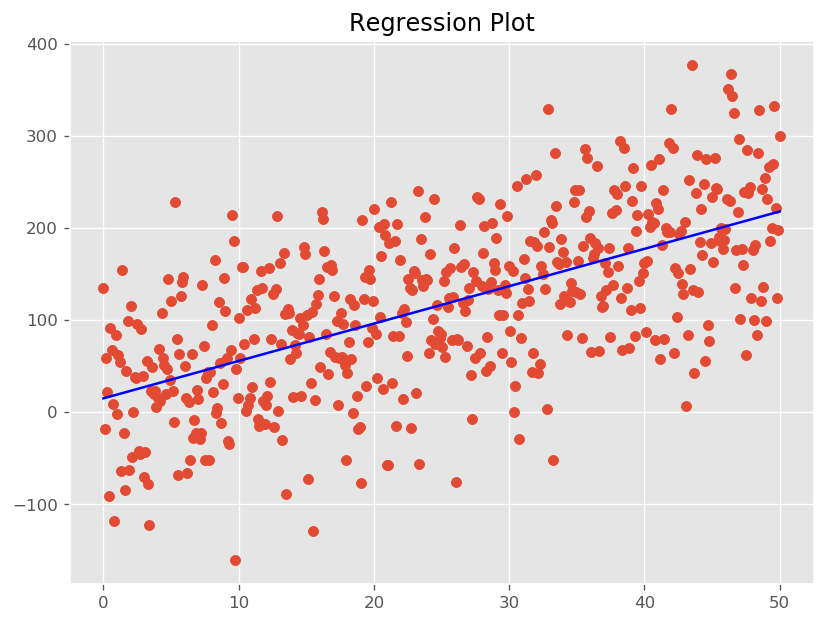

In [11]:
plt.figure(dpi=120)
plt.scatter(X, Y, cmap='Blues_r')
plt.plot(X, y_pred, c='b')
plt.title("Regression Plot")
plt.show()

## 2. Parameters estimation based on Batch GD(Full Batch)

### 2.1. Initializing parameters

In [12]:
# Choose initial theta
theta = [-0.5, 0.9]
# Learning Rate
lr = 0.001
# Number of iterations 
n_iter = 5000
# number of sample 
n = len(X)
# Cost 
cost = np.zeros((n_iter, 1))

### 2.2. Estimate parameters $\theta_0$(y-intercept) and $\theta_1$(slope) 

In [14]:
for i in range(n_iter):
    # Compute initial Y_predict with default theta
    Y_pred = theta[0] + theta[1] * X
    # Update theta
    theta[0] = theta[0] - lr * (1/n) * np.sum(Y_pred - Y)
    theta[1] = theta[1] - lr * (1/n) * np.sum((Y_pred - Y) * X)
    
    # Compute loss w.r.t full batch
    cost[i] = (1/n) * np.sum((Y_pred - Y)**2)
    
print("Estimated Weights: ")
print("theta0 = ", theta[0])
print("theta1 = ", theta[1])

Estimated Weights: 
theta0 =  13.93458531973822
theta1 =  4.087203564431606


### 2.3. Plotting cost function

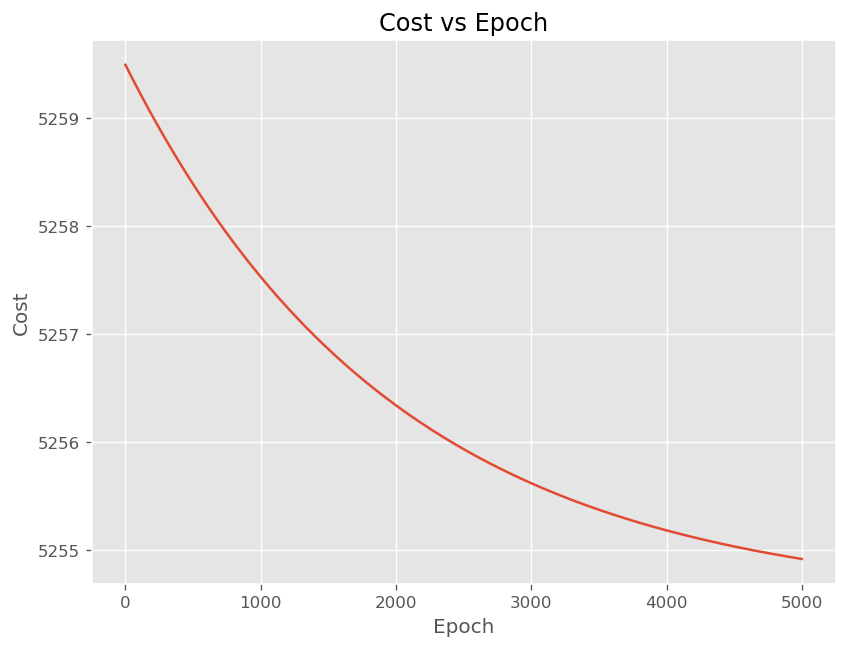

In [15]:
plt.figure(dpi=120)
plt.plot(np.array([i for i in range(n_iter)]), cost)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()

## 3. Parameters estimation using Stochastic GD

### 3.1. Initializing parameters

In [16]:
# Choose initial theta
theta = [22, 220]
# Compute Y
Y_pred = theta[0] + theta[1] * X
# Learning Rate
lr = 0.000001
# Number of epochs
n_epoch = 100
# number of sample 
n = len(X)
# Cost
cost = np.zeros((n_epoch, 1))

### 3.2. Perform Stochastic GD w.r.t one sample 

In [17]:
# Perform Stochastic Gradient Descent
# Epoch needed for more convergence 
for i in range(n_epoch):
    # For each iteration w.r.t one sample
    for j in range(len(X)):
        # Update theta
        theta[0] = theta[0] - lr *  (Y_pred[j] - Y[j])
        theta[1] = theta[1] - lr *  (Y_pred[j] - Y[j]) * X[j]
        
        # For each iteration, update Y 
        Y_pred = theta[0] + theta[1] * X
        
    # Update cost for each epoch 
    # Using MSE(Mean Squared Error) as Loss function
    cost[i] = (1/n) * np.sum((Y - Y_pred)**2)
    
print("Estimated Parameters: ")
print("theta0 = ", theta[0])
print("theta1 = ", theta[1])

Estimated Parameters: 
theta0 =  15.246674311374857
theta1 =  4.0481207634756275


### 3.3. Plotting cost function

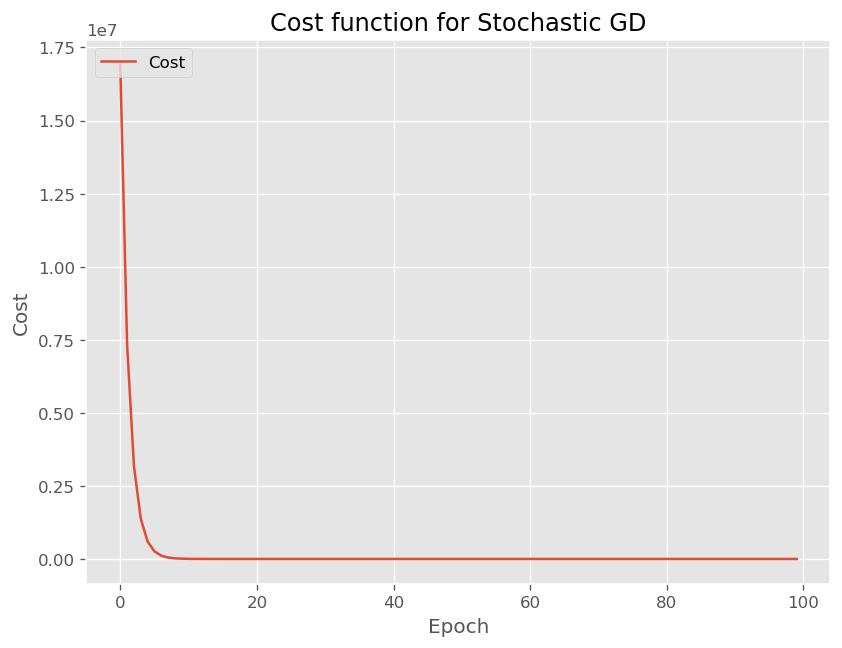

In [18]:
plt.figure(dpi=120)
plt.plot(np.array([i for i in range(n_epoch)]), cost)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost function for Stochastic GD")
plt.legend(['Cost'], loc='upper left')
plt.show()